## Predict cost of civil construction São Paulo/Brazil

Data - https://sindusconsp.com.br/sdm_downloads/cub-serie-historica/

From 2007 to 2021

Type of construction R8-N SINDUSCON-SP

Desenvolvido por [ARCH_DATA](https://github.com/anabeatrizfig) por [Ana Beatriz de Figueiredo Oliveira](https://www.linkedin.com/in/anabeatrizfig/)

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#pacotes para gerar os gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#PROPHET                               # utilizar o scikit-learn
#from fbprophet import Prophet

In [3]:
#formatação dos gráficos
sns.set_style('darkgrid')

### CUB R8-N SINDUSCON-SP

In [7]:
# Abrindo o df
df = pd.read_excel('CUB.xlsx')

In [8]:
# head
df.head()

,ano,mes,Global,MO,Material,Adm
0,2007,1,NaN,NaN,NaN,NaN
1,2007,2,695.02,349.82,326.76,18.44
2,2007,3,696.04,350.89,326.37,18.77
3,2007,4,700.99,354.21,328.02,18.77
4,2007,5,709.49,361.58,328.13,19.78


In [9]:
# tail
df.tail()

,ano,mes,Global,MO,Material,Adm
165,2020,10,1517.65,898.69,573.66,45.3
166,2020,11,1531.08,898.69,587.09,45.3
167,2020,12,1538.49,898.69,594.50,45.3
168,2021,1,1554.54,898.69,610.55,45.3
169,2021,2,1575.15,899.31,630.54,45.3


In [10]:
#Criar nova coluna data ano-mês

df['data'] = df['ano'].map(str) + '-' + df['mes'].map(str)

In [11]:
df.head()

,ano,mes,Global,MO,Material,Adm,data
0,2007,1,NaN,NaN,NaN,NaN,2007-1
1,2007,2,695.02,349.82,326.76,18.44,2007-2
2,2007,3,696.04,350.89,326.37,18.77,2007-3
3,2007,4,700.99,354.21,328.02,18.77,2007-4
4,2007,5,709.49,361.58,328.13,19.78,2007-5


In [12]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ano       170 non-null    int64  
 1   mes       170 non-null    int64  
 2   Global    169 non-null    float64
 3   MO        169 non-null    float64
 4   Material  169 non-null    float64
 5   Adm       169 non-null    float64
 6   data      170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [13]:
#Transformar o valor str em data

df['data'] = pd.to_datetime(df['data'], format = '%Y-%m')

In [14]:
df.head()

,ano,mes,Global,MO,Material,Adm,data
0,2007,1,NaN,NaN,NaN,NaN,2007-01-01
1,2007,2,695.02,349.82,326.76,18.44,2007-02-01
2,2007,3,696.04,350.89,326.37,18.77,2007-03-01
3,2007,4,700.99,354.21,328.02,18.77,2007-04-01
4,2007,5,709.49,361.58,328.13,19.78,2007-05-01


In [15]:
df.tail()

,ano,mes,Global,MO,Material,Adm,data
165,2020,10,1517.65,898.69,573.66,45.3,2020-10-01
166,2020,11,1531.08,898.69,587.09,45.3,2020-11-01
167,2020,12,1538.49,898.69,594.50,45.3,2020-12-01
168,2021,1,1554.54,898.69,610.55,45.3,2021-01-01
169,2021,2,1575.15,899.31,630.54,45.3,2021-02-01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ano       170 non-null    int64         
 1   mes       170 non-null    int64         
 2   Global    169 non-null    float64       
 3   MO        169 non-null    float64       
 4   Material  169 non-null    float64       
 5   Adm       169 non-null    float64       
 6   data      170 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 9.4 KB


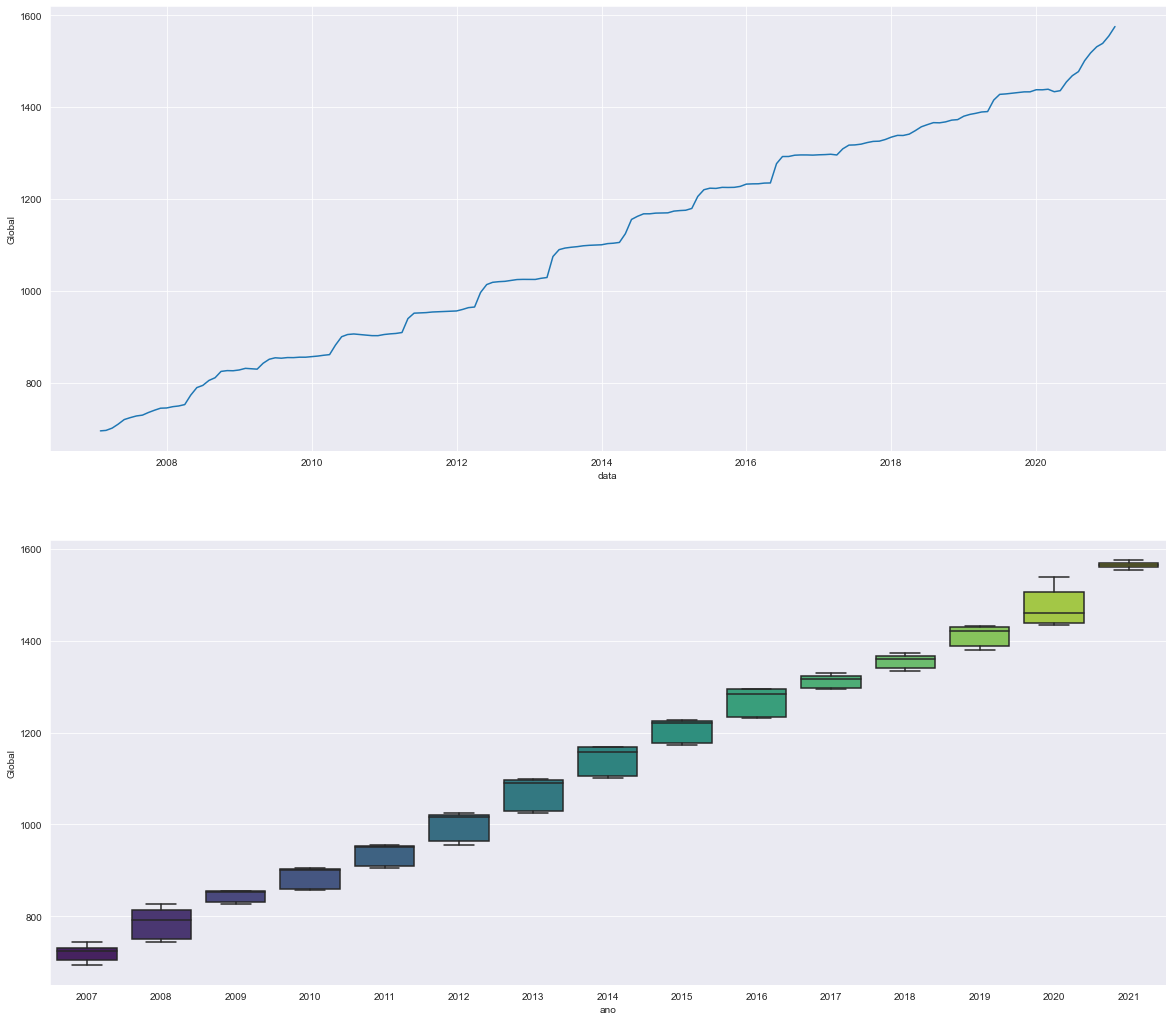

In [17]:
#Visualizar os dados - PREÇO GLOBAL

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'Global', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'Global', data=df, ax = ax2, palette = 'viridis');

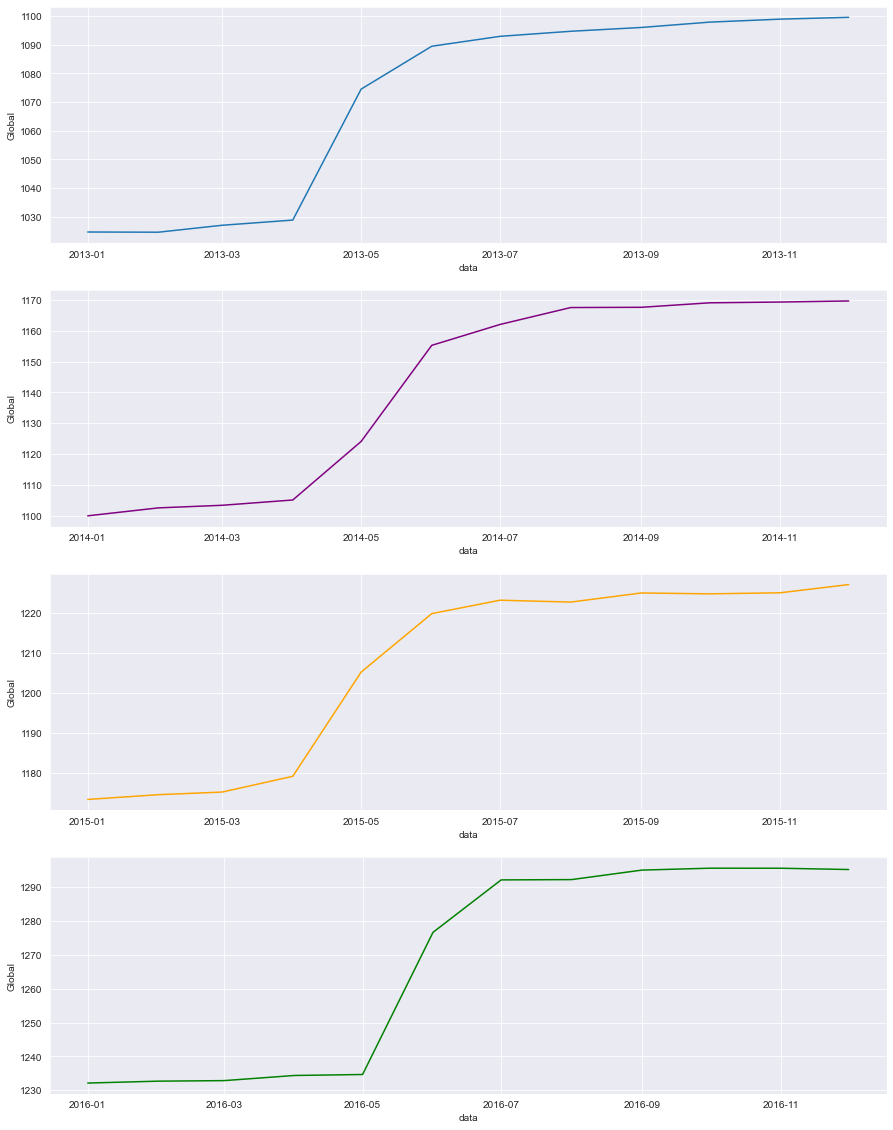

In [18]:
#Visualizar os dados - PREÇO GLOBAL - padrão de variação dos valores no ano

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,20))

sns.lineplot(x= 'data', y = 'Global', data=df.loc[df['ano']==2013], ax = ax1)
sns.lineplot(x= 'data', y = 'Global', data=df.loc[df['ano']==2014], ax = ax2, color='purple')
sns.lineplot(x= 'data', y = 'Global', data=df.loc[df['ano']==2015], ax = ax3, color='orange')
sns.lineplot(x= 'data', y = 'Global', data=df.loc[df['ano']==2016], ax = ax4, color='green');

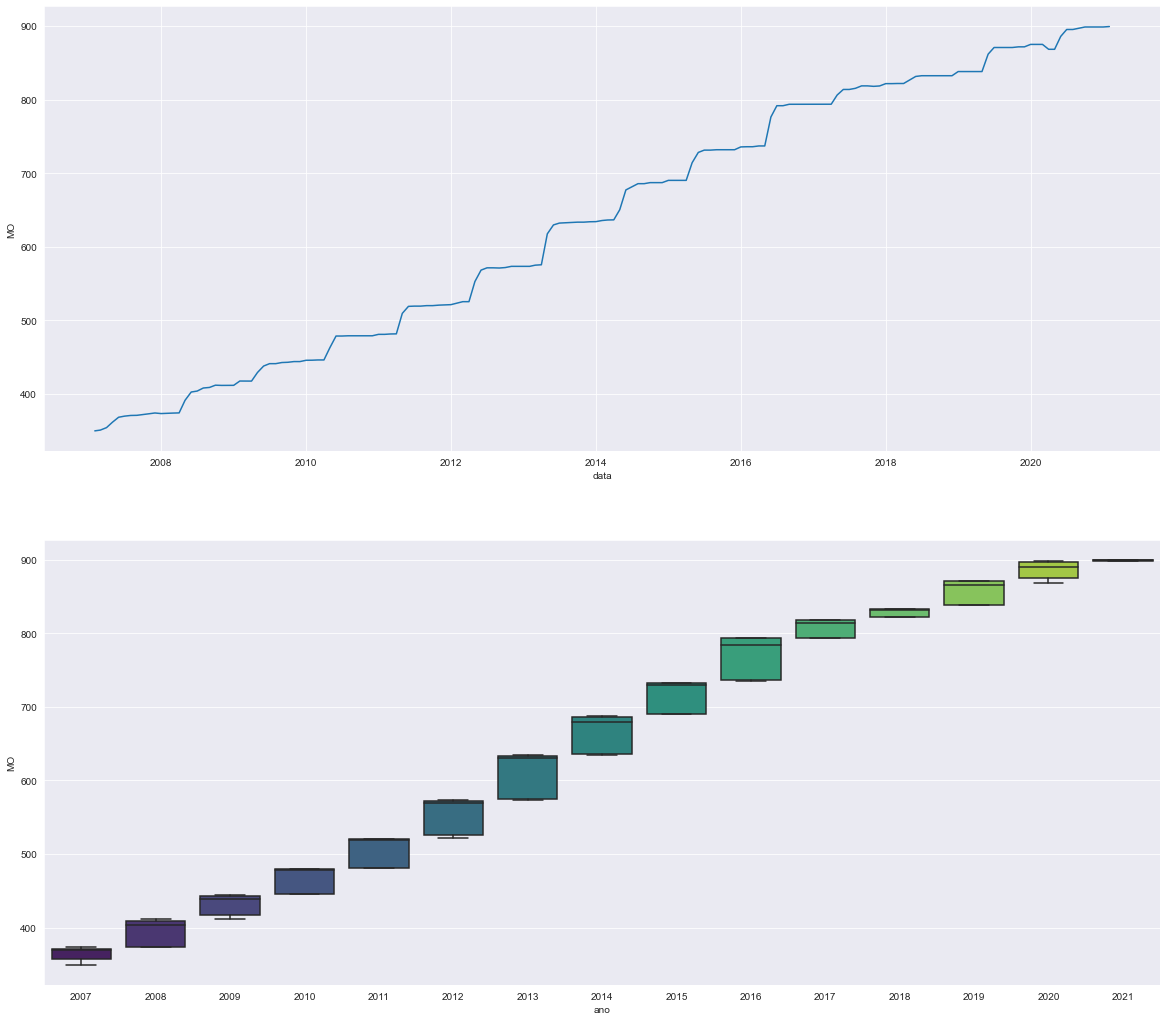

In [19]:
#Visualizar os dados - PREÇO MÃO-DE-OBRA

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'MO', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'MO', data=df, ax = ax2, palette = 'viridis');



### ValueError: Could not interpret value `Mao-de-obra` for parameter `y` == MO

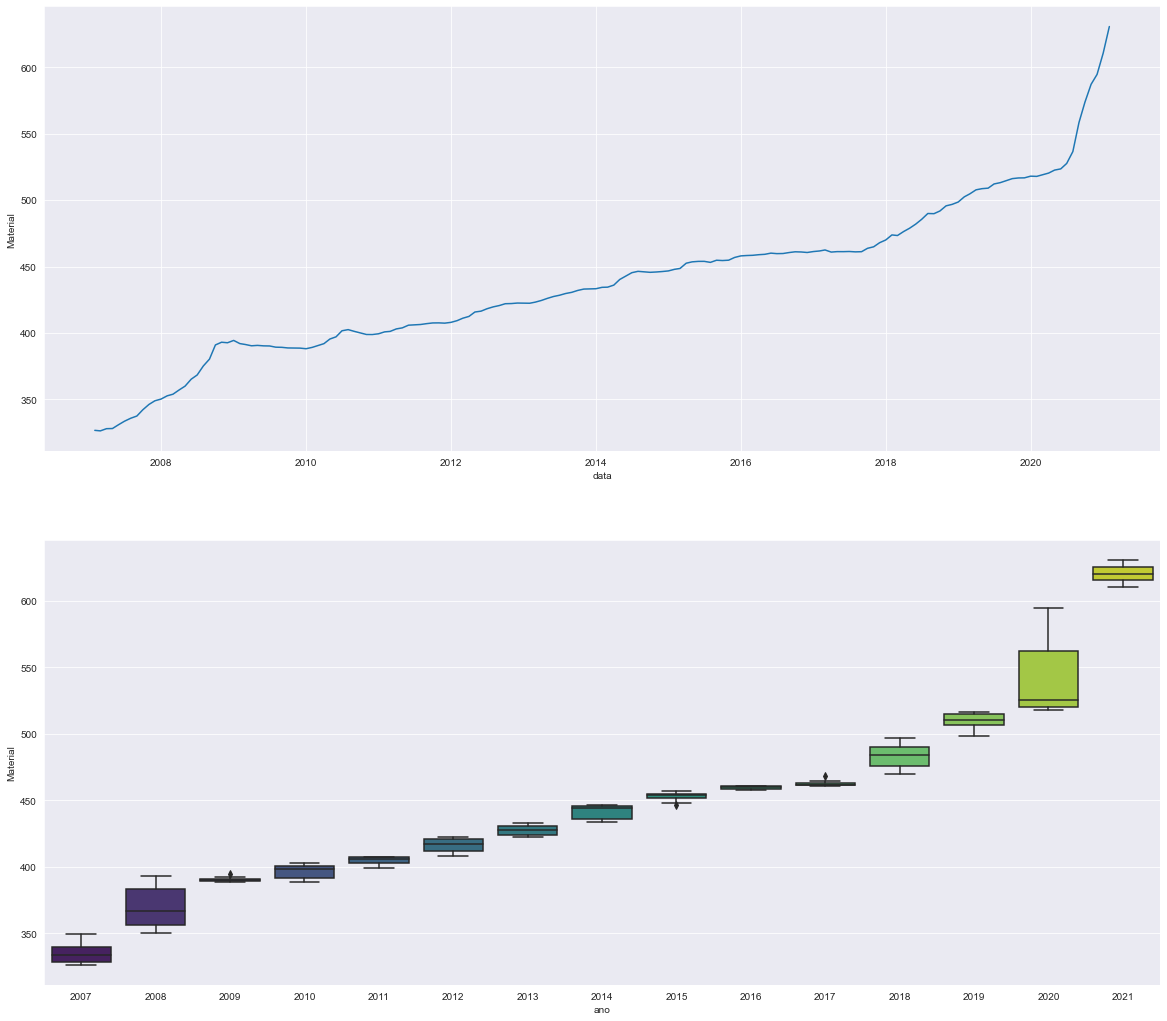

In [20]:
#Visualizar os dados - PREÇO MATERIAL

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'Material', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'Material', data=df, ax = ax2, palette = 'viridis');

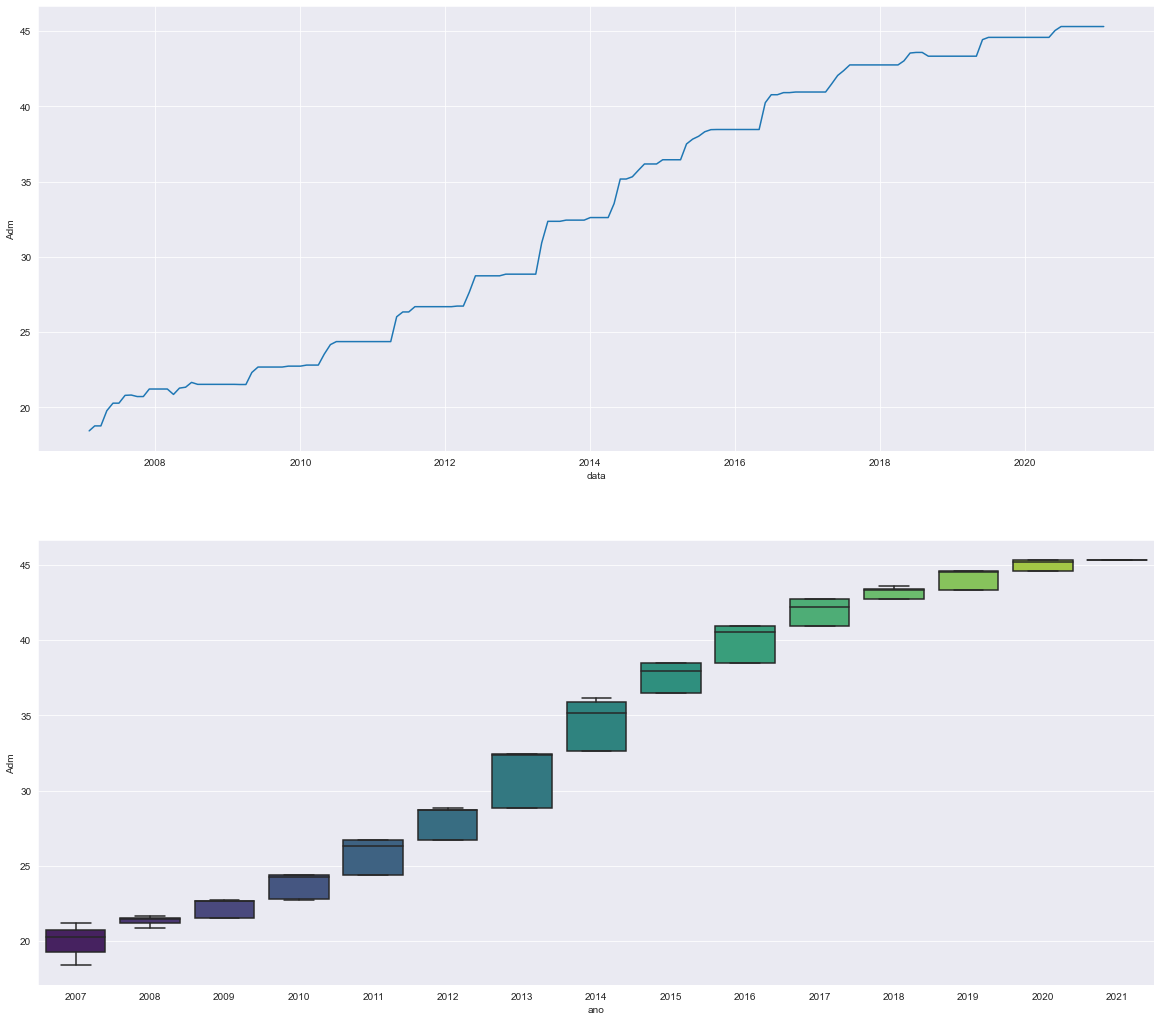

In [21]:
#Visualizar os dados - PREÇO ADMINISTRAÇÃO
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,18))

sns.lineplot(x= 'data', y = 'Adm', data=df, ax = ax1)
sns.boxplot(x = 'ano', y = 'Adm', data=df, ax = ax2, palette = 'viridis');

# scikit-learn

In [15]:
# scikit-learn
#treinar com os valores de 2007 a 2018 | testar com os valores de 2019


df_train = df.loc[df['ano'] <= 2018]
df_test = df.loc[df['ano'] == 2019]

In [16]:
df_train.tail()

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
139,2018,8,1323.23,801.22,485.94,36.07,2018-08-01
140,2018,9,1322.96,801.22,485.89,35.85,2018-09-01
141,2018,10,1325.07,801.22,488.00,35.85,2018-10-01
142,2018,11,1328.88,801.22,491.81,35.85,2018-11-01
143,2018,12,1329.92,801.22,492.85,35.85,2018-12-01


In [17]:
df_test

,ano,mes,preco_global,preco_MO,preco_MAT,preco_ADM,data
144,2019,1,1337.25,806.66,494.74,35.85,2019-01-01
145,2019,2,1341.18,806.66,498.67,35.85,2019-02-01
146,2019,3,1343.42,806.66,500.91,35.85,2019-03-01
147,2019,4,1346.44,806.66,503.93,35.85,2019-04-01
148,2019,5,1347.34,806.66,504.83,35.85,2019-05-01
149,2019,6,1371.45,829.41,505.27,36.77,2019-06-01
150,2019,7,1383.15,838.13,508.13,36.89,2019-07-01
151,2019,8,1384.26,838.13,509.24,36.89,2019-08-01


### Ajustando o df de train para o formato do PROPHET

In [18]:
#usando os valores de preco_global
df_1 = df_train[['data', 'preco_global']]

In [19]:
#Padronizar as colunas para o modelo
df_1.columns = ['ds', 'y']

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


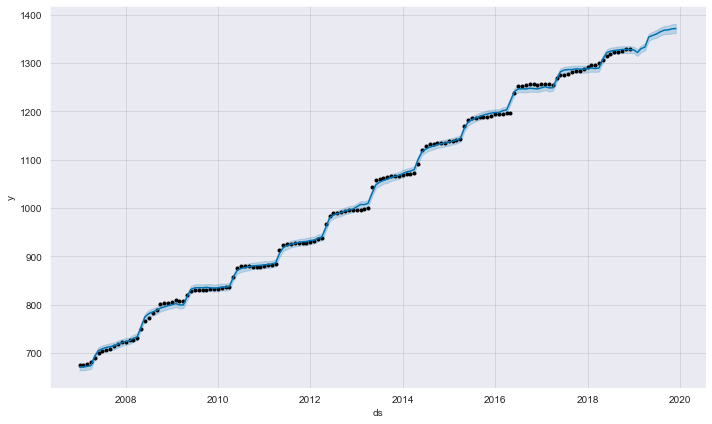

In [21]:
# Rodando o modelo - considerando sazonalidade dentro dos anos e fazendo previsão mensal
m1 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False).fit(df_1)
future1 = m1.make_future_dataframe(periods=12, freq='M')
fcst1 = m1.predict(future1)
fig1 = m1.plot(fcst1)

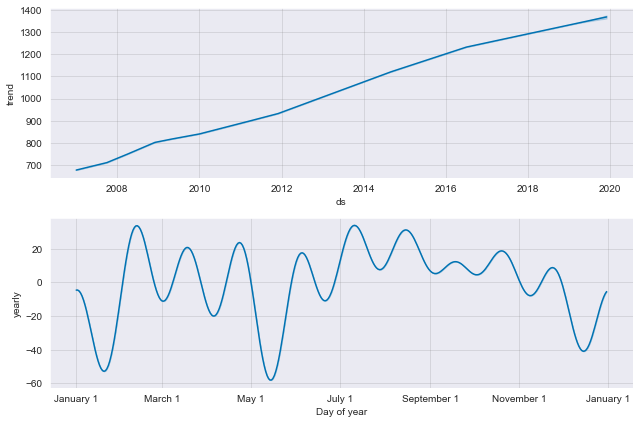

In [22]:
#Componentes do modelo - sazonalidade e tendência
fig2 = m1.plot_components(fcst1)

In [23]:
#Valores previstos
model1 = fcst1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
model1 = model1.round(2)
model1.tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,2018-12-31,1327.33,1320.63,1334.07
145,2019-01-31,1321.84,1314.66,1328.80
146,2019-02-28,1329.79,1322.74,1336.60
147,2019-03-31,1332.95,1325.72,1340.51
148,2019-04-30,1353.78,1345.98,1360.66
149,2019-05-31,1357.19,1350.23,1364.62
150,2019-06-30,1360.10,1351.98,1368.46
151,2019-07-31,1364.74,1356.56,1373.40
152,2019-08-31,1368.11,1359.95,1376.92
153,2019-09-30,1368.59,1360.00,1377.31


In [24]:
#Separar o modelo com as dados de 2019 para comparar com os valores reais
model1 = model1.loc[model1['ds']>='2019-01-01']

In [25]:
model1['ano'] = model1['ds'].dt.year
model1['mes'] = model1['ds'].dt.month

In [26]:
model1 = model1.loc[model1['mes']<=8]

In [27]:
model1['data'] = model1['ano'].map(str) + '-' + model1['mes'].map(str)
model1['ds'] = pd.to_datetime(model1['data'], format = '%Y-%m')

In [28]:
model1.drop(['ano', 'mes', 'data'], axis=1, inplace=True)
model1

,ds,yhat,yhat_lower,yhat_upper
145,2019-01-01,1321.84,1314.66,1328.80
146,2019-02-01,1329.79,1322.74,1336.60
147,2019-03-01,1332.95,1325.72,1340.51
148,2019-04-01,1353.78,1345.98,1360.66
149,2019-05-01,1357.19,1350.23,1364.62
150,2019-06-01,1360.10,1351.98,1368.46
151,2019-07-01,1364.74,1356.56,1373.40
152,2019-08-01,1368.11,1359.95,1376.92


In [29]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 145 to 152
Data columns (total 4 columns):
ds            8 non-null datetime64[ns]
yhat          8 non-null float64
yhat_lower    8 non-null float64
yhat_upper    8 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 320.0 bytes


In [30]:
df_test1 = df_test[['data', 'preco_global']]
df_test1.columns = ['ds', 'y']

In [31]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 144 to 151
Data columns (total 2 columns):
ds    8 non-null datetime64[ns]
y     8 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 192.0 bytes


In [32]:
#juntando os valores de teste e previsão para analisar a qualidade do modelo
df_val = pd.merge(df_test1, model1, on='ds')
df_val

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-01-01,1337.25,1321.84,1314.66,1328.80
1,2019-02-01,1341.18,1329.79,1322.74,1336.60
2,2019-03-01,1343.42,1332.95,1325.72,1340.51
3,2019-04-01,1346.44,1353.78,1345.98,1360.66
4,2019-05-01,1347.34,1357.19,1350.23,1364.62
5,2019-06-01,1371.45,1360.10,1351.98,1368.46
6,2019-07-01,1383.15,1364.74,1356.56,1373.40
7,2019-08-01,1384.26,1368.11,1359.95,1376.92


In [33]:
df_val['dif'] = df_val['y'] - df_val['yhat']
df_val

,ds,y,yhat,yhat_lower,yhat_upper,dif
0,2019-01-01,1337.25,1321.84,1314.66,1328.80,15.41
1,2019-02-01,1341.18,1329.79,1322.74,1336.60,11.39
2,2019-03-01,1343.42,1332.95,1325.72,1340.51,10.47
3,2019-04-01,1346.44,1353.78,1345.98,1360.66,-7.34
4,2019-05-01,1347.34,1357.19,1350.23,1364.62,-9.85
5,2019-06-01,1371.45,1360.10,1351.98,1368.46,11.35
6,2019-07-01,1383.15,1364.74,1356.56,1373.40,18.41
7,2019-08-01,1384.26,1368.11,1359.95,1376.92,16.15


In [34]:
df_val.describe().round(2)

,y,yhat,yhat_lower,yhat_upper,dif
count,8.00,8.00,8.00,8.00,8.00
mean,1356.81,1348.56,1340.98,1356.25,8.25
std,19.51,17.68,17.29,18.31,10.77
min,1337.25,1321.84,1314.66,1328.80,-9.85
25%,1342.86,1332.16,1324.98,1339.53,6.02
50%,1346.89,1355.48,1348.10,1362.64,11.37
75%,1374.38,1361.26,1353.12,1369.70,15.60
max,1384.26,1368.11,1359.95,1376.92,18.41


In [35]:
df_val['mes'] = df_val['ds'].dt.month

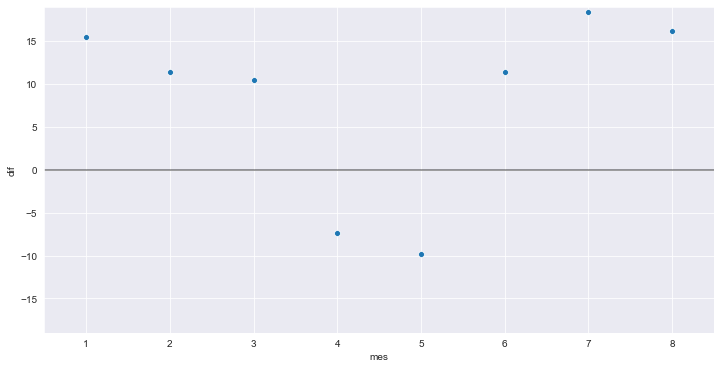

In [36]:
#Análise dos erros - estão na faixa de R$10 a R$20
fig, ax = plt.subplots(figsize=(12,6))
plt.ylim(-19,19)
plt.xlim(0.5,8.5)
ref = 0
ref2 = [*range(0, 10)]
sns.scatterplot(x = 'mes', y = 'dif', data=df_val)
sns.lineplot(x = ref2, y = ref, color = 'black', alpha=0.5);

In [37]:
print('Soma dos erros: R$', df_val['dif'].sum().round(2))
print('Média dos erros: R$', df_val['dif'].mean().round(2))

Soma dos erros: R$ 65.99
Média dos erros: R$ 8.25


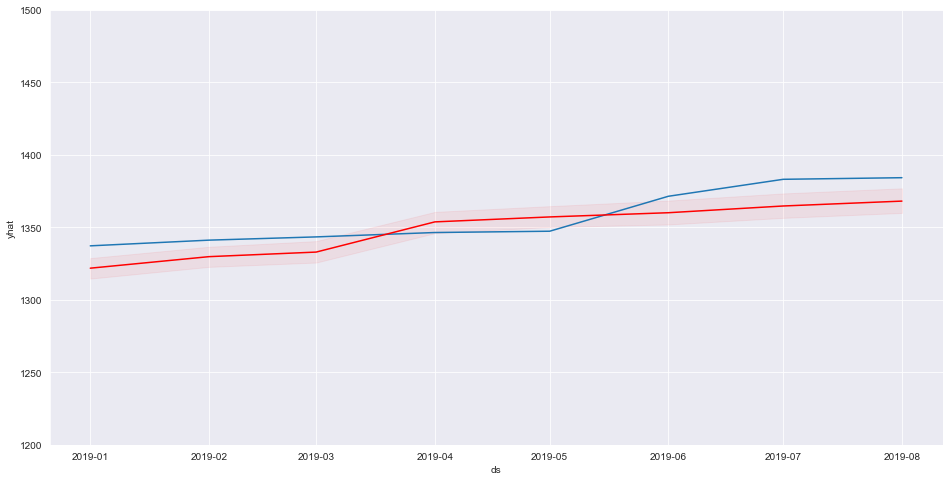

In [38]:
#Comparando o valor real do previsto para 2019 - teve um atraso em 2019 no aumento mais significativo do ano

fig, ax = plt.subplots(figsize=(16,8))
plt.ylim(1200,1500)

sns.lineplot(x='ds', y='y', data=df_val)
sns.lineplot(x='ds', y='yhat', data=df_val, color='red')
ax.fill_between(df_val['ds'], df_val['yhat_upper'], df_val['yhat_lower'], color='red', alpha=0.06);